# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

cast = pd.read_csv('/Users/julioberrocal/Desktop/Classes/Winter 2024/Advanced Programming/Data/cast.csv')
titles = pd.read_csv('/Users/julioberrocal/Desktop/Classes/Winter 2024/Advanced Programming/Data/titles.csv')
release_dates = pd.read_csv('/Users/julioberrocal/Desktop/Classes/Winter 2024/Advanced Programming/Data/release_dates.csv') 

cast = cast[cast['year'] <= 2024]
titles = titles[titles['year'] <= 2024]
release_dates = release_dates[release_dates['year'] <= 2024]



/var/folders/jd/f_y1zkqx7qj3nlzj3h0lgsbc0000gn/T/ipykernel_85251/2914197180.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
#cast.head()
#titles.head()
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [50]:
cast_records = len(cast)
titles_records = len(titles)
release_dates_records = len(release_dates)

print("DataFrame: cast")
print("Number of Records:", cast_records)
print("Data Columns:", cast.columns.tolist())
#print('Info:', cast.info())

print("DataFrame: titles")
print("Number of Records:", titles_records)
print("Data Columns:", titles.columns.tolist())
#print('Info:', titles.info())

print("DataFrame: release_dates")
print("Number of Records:", release_dates_records)
print("Data Columns:", release_dates.columns.tolist())
print('Info:', release_dates.info())

DataFrame: cast
Number of Records: 3442890
Data Columns: ['title', 'year', 'name', 'type', 'character', 'n', 'decade']
DataFrame: titles
Number of Records: 226010
Data Columns: ['title', 'year', 'decade']
DataFrame: release_dates
Number of Records: 443484
Data Columns: ['title', 'year', 'country', 'date', 'day_of_week', 'month']
<class 'pandas.core.frame.DataFrame'>
Index: 443484 entries, 0 to 443485
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   title        443483 non-null  object        
 1   year         443484 non-null  int64         
 2   country      443484 non-null  object        
 3   date         443484 non-null  datetime64[ns]
 4   day_of_week  443484 non-null  object        
 5   month        443484 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 23.7+ MB
Info: None


The size of the cast data set is 3,442,890. It contains a 6 different columns with 4 object types, 1 integer type and 1 float type. 

The size of the titles data set is 226,010. It contains 2 different columns with 2 different types, 1 object and 1 integer.

The size of the release date data set is 443,484. It contains 4 different columns with 2 different types, 3 objects and 1 integer.

### 2. How many movies have the title North by Northwest

In [51]:
len(titles[titles['title'] == 'North by Northwest'])

1

### 3. How many version of Hamlet are there, when was the first made? the last?

In [3]:
hamlet_movies = titles[titles['title'] == 'Hamlet']

hamlet_movies_sorted = hamlet_movies.sort_values(by='year')
first_year = hamlet_movies_sorted.iloc[0]['year']
last_year = hamlet_movies_sorted.iloc[-1]['year']

print("Number of versions of Hamlet:", len(hamlet_movies_sorted))
print("Year of the first version of Hamlet:", first_year)
print("Year of the last version of Hamlet:", last_year)


Number of versions of Hamlet: 20
Year of the first version of Hamlet: 1910
Year of the last version of Hamlet: 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [53]:
treasure_island_movies = titles[titles['title'] == 'Treasure Island']

treasure_island_sorted = treasure_island_movies.sort_values(by='year')

print("Movies called 'Treasure Island' from oldest to newest:")
print(treasure_island_sorted[['title', 'year']])


Movies called 'Treasure Island' from oldest to newest:
                  title  year
180911  Treasure Island  1918
108853  Treasure Island  1920
87953   Treasure Island  1934
126321  Treasure Island  1950
190233  Treasure Island  1972
122150  Treasure Island  1973
52099   Treasure Island  1985
36752   Treasure Island  1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [54]:
total_movies_1950 = len(titles[titles['year'] == 1950])

total_movies_1980 = len(titles[titles['year'] == 1980])

total_movies_2000 = len(titles[titles['year'] == 2000])


print("Number of movies made in 1950:", total_movies_1950)
print("Number of movies made in 1980:", total_movies_1980)
print("Number of movies made in 2000:", total_movies_2000)


Number of movies made in 1950: 1109
Number of movies made in 1980: 1750
Number of movies made in 2000: 2568


### 6. How big was the cast of Metropolis


In [55]:
metropolis_cast = len(cast[cast['title'] == 'Metropolis'])

print("Number of unique cast members in 'Metropolis':", metropolis_cast)


Number of unique cast members in 'Metropolis': 33


### 7. How many roles for actors were there 1950's? 1990's

In [56]:
roles_1950 = len(cast[(cast['type'] == 'actor') & (cast['year'] // 10 == 195)])
roles_1990 = len(cast[(cast['type'] == 'actor') & (cast['year'] // 10 == 199)])

print("Number of roles for actors in the 1950s:", roles_1950)
print("Number of roles for actors in the 1990s:", roles_1990)


Number of roles for actors in the 1950s: 153559
Number of roles for actors in the 1990s: 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

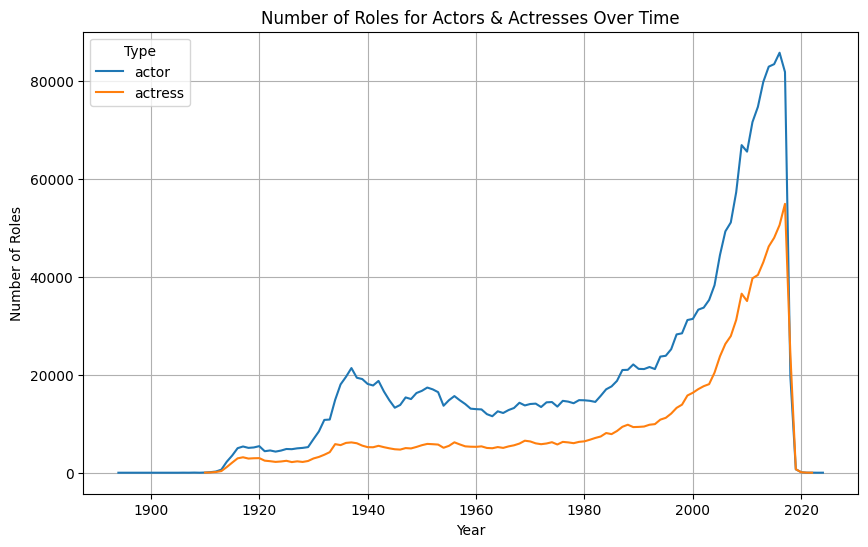

In [5]:
roles_over_time = cast.groupby(['year', 'type']).size().unstack()

roles_over_time.plot(kind='line', figsize=(10, 6))

plt.title('Number of Roles for Actors & Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')

plt.legend(title='Type')
plt.grid(True)
plt.show()


### 9. How many "leading roles" were there in the 2000's?

In [58]:
leading_roles_2000 = len(cast[(cast['year'] // 10 == 200) & (cast['n'] == 1)])

print("Number of leading roles in the 2000s:", leading_roles_2000)


Number of leading roles in the 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [59]:
no_ranking_2000s = len(cast[(cast['year'] >= 2000) & (cast['year'] < 2010) & (cast['n'].isnull())])

no_ranking_1950s = len(cast[(cast['year'] >= 1950) & (cast['year'] < 1960) & (cast['n'].isnull())])



print(f'Number of roles with no ranking in the 2000s: {no_ranking_2000s}')
print(f'Number of roles with no ranking in the 1950s: {no_ranking_1950s}')

Number of roles with no ranking in the 2000s: 232037
Number of roles with no ranking in the 1950s: 95406


### 11. Plot the number of films made in each decade

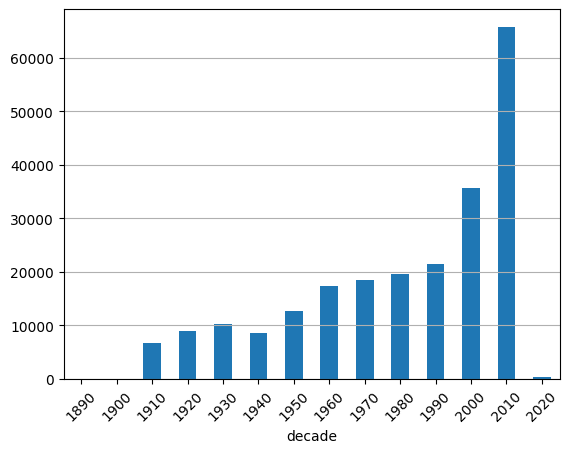

In [10]:
titles['decade'] = titles['year'] // 10 * 10
films_per_decade = titles.groupby('decade').size()
films_per_decade.plot(kind='bar', rot=45)
plt.grid(axis='y')
plt.show()


### 12. Plot the number of films with a Rustler character over time

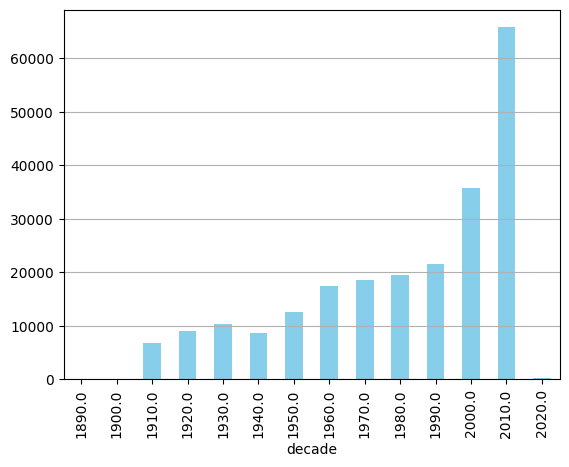

In [13]:
rustler_roles = cast[cast['character'] == 'Rustler']
merged_df = pd.concat([rustler_roles, titles], ignore_index=True)

films_with_rustler_per_decade = merged_df.groupby('decade').size()

films_with_rustler_per_decade.plot(kind='bar', color='skyblue')
plt.grid(axis='y')
plt.show()

### 13. What are the top ten character names of all time?

In [62]:
top_ten_characters = cast['character'].value_counts().head(10)

print(top_ten_characters)


character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [64]:
roles_1990= cast[(cast['year'] >= 1990) & (cast['year'] <= 1999)]
top_actor_1990 = roles_1990['name'].value_counts().head(1)

print("Actor with the most films in the 1990s:\n", top_actor_1990)


Actor with the most films in the 1990s:
 name
Shakti Kapoor    143
Name: count, dtype: int64


### 15. What are the top 10 roles that start with Science?

In [65]:
science_roles = cast[cast['character'].str.startswith('Science', na=False)]

top_science_roles = science_roles['character'].value_counts().head(10)

print("Top 10 roles that start with 'Science':\n", top_science_roles)


Top 10 roles that start with 'Science':
 character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [66]:
cast_size = cast['title'].value_counts().head(1)

print("Film with the largest cast:", cast_size)


Film with the largest cast: title
Around the World in 80 Days    1364
Name: count, dtype: int64


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [68]:
cz_per_film = cast.groupby('title').count().describe()

print("Descriptive Statistics for Cast Sizes:", cz_per_film)


Descriptive Statistics for Cast Sizes:                 year           name           type      character  \
count  168252.000000  168252.000000  168252.000000  168252.000000   
mean       20.462663      20.462663      20.462663      20.462616   
std        24.206753      24.206753      24.206753      24.206715   
min         1.000000       1.000000       1.000000       1.000000   
25%         6.000000       6.000000       6.000000       6.000000   
50%        13.000000      13.000000      13.000000      13.000000   
75%        26.000000      26.000000      26.000000      26.000000   
max      1364.000000    1364.000000    1364.000000    1364.000000   

                   n         decade  
count  168252.000000  168252.000000  
mean       12.571137      20.462663  
std        17.336028      24.206753  
min         0.000000       1.000000  
25%         1.000000       6.000000  
50%         8.000000      13.000000  
75%        16.000000      26.000000  
max       688.000000    1364.000000

After looking at the data, we can see that the total number of casts is 168,252. The average cast size is around 20 with a standard deviation of 24. It is very interesting that the smallest cast size is 1 cast member and the maximum is a staggering 1,364.

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [69]:
np_films = cast[cast['name'] == 'Natalie Portman']
np_films.groupby('year').size()

year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [70]:
np_lead_films = cast[(cast['name'] == 'Natalie Portman') & (cast['n'].isin([1, 2]))]
np_lead_yearly = np_lead_films.groupby('year').size()
print(np_lead_yearly)


year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64


### 20. Determine how many roles for actor or actress by decade. Plot the output 

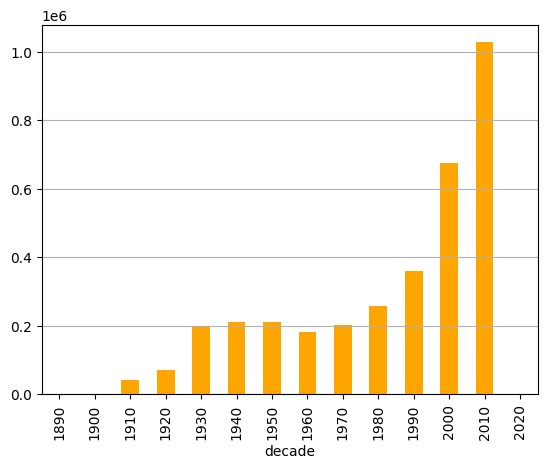

In [19]:
cast['decade'] = cast['year'] // 10 * 10
roles_per_decade = cast.groupby('decade').size()
roles_per_decade.plot(kind='bar', color='orange')
plt.grid(axis='y')
plt.show()


### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [21]:
release_dates['date'] = pd.to_datetime(release_dates['date'])
release_dates['day_of_week'] = release_dates['date'].dt.day_name()
release_dates['month'] = release_dates['date'].dt.month_name()

pivot_table = pd.pivot_table(release_dates, index='day_of_week', columns='month', aggfunc='size', fill_value=0)

days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table.reindex(index=days, columns=months)

for day in days:
    total = pivot_table.loc[day].sum()
    print(f'Total releases on a {day}: {total}.')

for month in months:
    total = pivot_table[month].sum()
    print(f'Total releases in {month}: {total}.')


Total releases on a Monday: 37209.
Total releases on a Tuesday: 16762.
Total releases on a Wednesday: 53439.
Total releases on a Thursday: 125746.
Total releases on a Friday: 163173.
Total releases on a Saturday: 31332.
Total releases on a Sunday: 15823.
Total releases in January: 39412.
Total releases in February: 36307.
Total releases in March: 40257.
Total releases in April: 37674.
Total releases in May: 35449.
Total releases in June: 32704.
Total releases in July: 31421.
Total releases in August: 35011.
Total releases in September: 37750.
Total releases in October: 40204.
Total releases in November: 38200.
Total releases in December: 39095.


Friday stands out as the most popular day for movie releases, with a significantly higher number compared to other days of the week. This might be due to the anticipation of weekend moviegoers and the opportunity for films to generate buzz before the weekend box office. This observation also applies to Thursday's, which are the second most popular day for movie releases, probably due to the close arrival of the weekend. 

In terms of months, it is surprising that May, June and July have such small numbers, as I would expect more people would have free time in the summer months, leading to a higher availability to go to the cinema. In contrast, It is March and October who are the months with the highest number of releases, but it is important to note that the release dates per month are much closer to each other than the release dates per day of the week.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

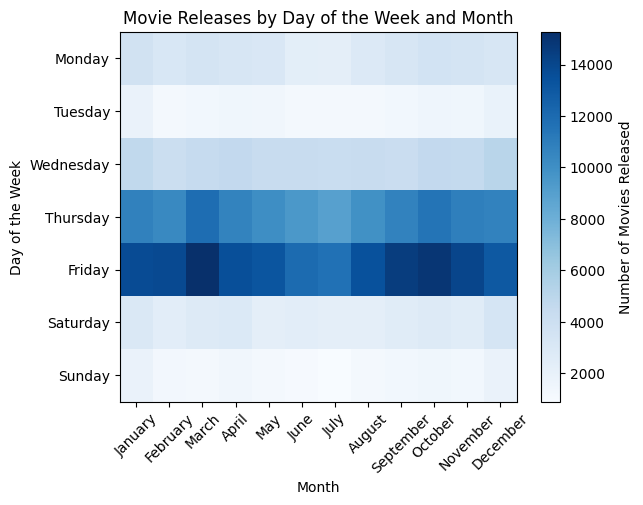

In [26]:
#pivot_table.plot() 

#The output from the plot above seems correct but the graph is very difficult to visualize.
#It would be better to use a heatmap


plt.imshow(pivot_table, cmap='Blues', aspect='auto')

plt.xticks(range(len(months)), months, rotation=45)
plt.yticks(range(len(days)), days)

plt.colorbar(label='Number of Movies Released', ax=None)

plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.title('Movie Releases by Day of the Week and Month')

plt.show()



### 23. What films did actors in Star Wars go on to appear in? 

In [28]:
sw_actors = cast[cast['title'] == 'Star Wars']['name'].unique()
other_films = cast[cast['name'].isin(sw_actors) & (cast['title'] != 'Star Wars')]
print(other_films[['title', 'year']].drop_duplicates())


                                  title  year
59905      Every Little Crook and Nanny  1972
59906      Linda Lovelace for President  1975
59907                         Rogue One  2016
59908                       Smorgasbord  1983
59910                     The Roommates  1973
...                                 ...   ...
3185169              George and Mildred  1980
3185170            International Velvet  1978
3185171  Miss Pettigrew Lives for a Day  2008
3185172                     Miss Potter  2006
3185174    No Sex Please: We're British  1973

[990 rows x 2 columns]
